# Diamonds - Price Analysis

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
diamonds = pd.read_csv('../Data/diamonds_hist.csv')

In [371]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [372]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [373]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [374]:
clarity_scale = {
                'IF' : 10, 'VVS1' : 9, 
                'VVS2' : 8, 'VS1' : 7, 
                'VS2' : 6, 'SI1' : 5, 
                'SI2' : 4, 'I1' : 3, 
                'I2' : 2, 'I3' : 1
                }

In [375]:
cut_scale = {
            'Premium' : 5, 
            'Good' : 4, 
            'Very Good' : 3, 
            'Ideal' : 2, 
            'Fair' :1
            }

In [376]:
color_scale = {
                'D' : 1, 'E' : 2, 
                'F' : 3, 'G' : 4, 
                'H' : 5, 'I' : 6, 
                'J' : 7
                }

In [377]:
diamonds['clarity_scale'] = diamonds['clarity'].map(clarity_scale)
diamonds['cut_scale'] = diamonds['cut'].map(cut_scale)

In [378]:
diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_scale,cut_scale
count,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000,48940.000000
mean,0.797817,61.751931,57.451161,3934.409644,5.730712,5.734333,3.538648,6.055456,3.141582
std,0.474126,1.430026,2.233450,3989.333861,1.121920,1.145344,0.706817,1.645542,1.270034
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,3.000000,1.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,5.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,6.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.250000,6.540000,6.540000,4.040000,7.000000,5.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,10.000000,5.000000


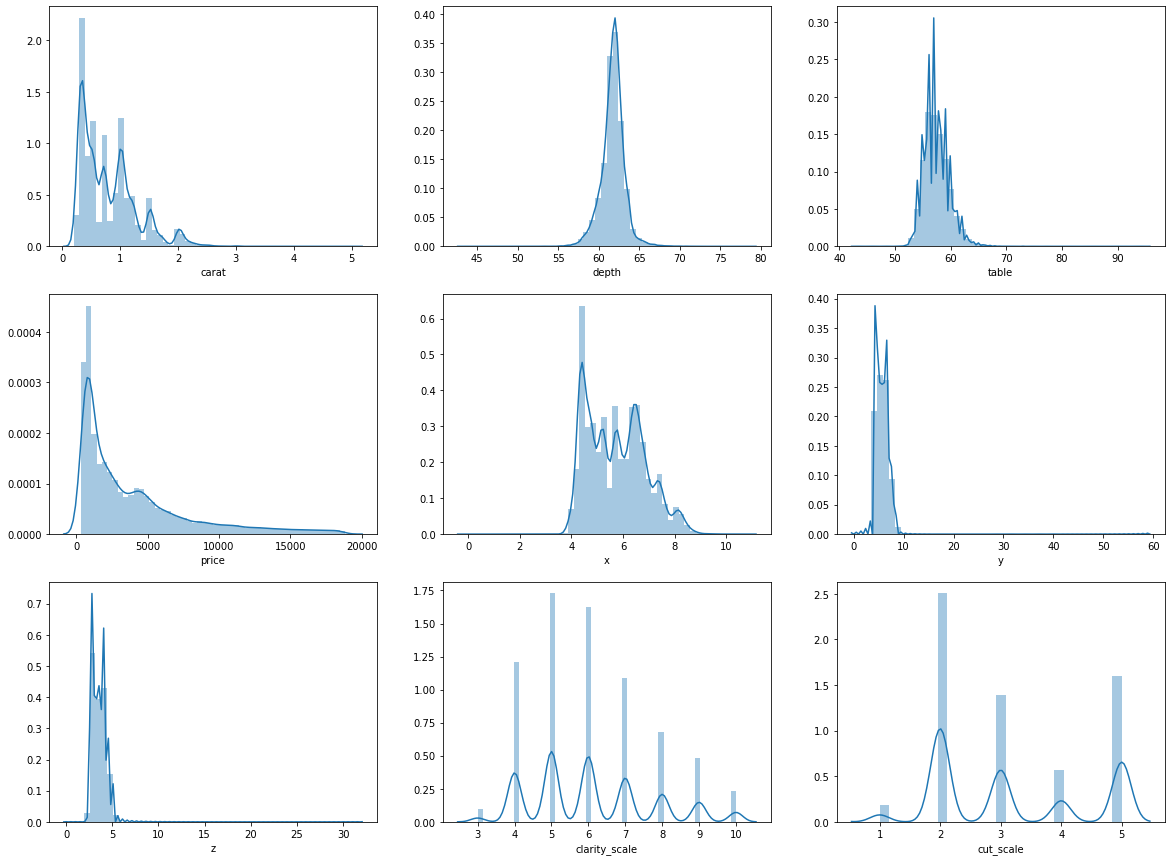

In [386]:
fig, ax = plt.subplots(3,3, figsize=(20,15))

sns.distplot(diamonds.carat, ax=ax[0][0])
sns.distplot(diamonds.depth, ax=ax[0][1])
sns.distplot(diamonds.table, ax=ax[0][2])
sns.distplot(diamonds.price, ax=ax[1][0])
sns.distplot(diamonds.x, ax=ax[1][1])
sns.distplot(diamonds.y, ax=ax[1][2])
sns.distplot(diamonds.z, ax=ax[2][0])
sns.distplot(diamonds.clarity_scale, ax=ax[2][1])
sns.distplot(diamonds.cut_scale, ax=ax[2][2]);

In [388]:
carat_range = diamonds['carat'].describe()

In [389]:
diamonds['carat'].describe()

count    48940.000000
mean         0.797817
std          0.474126
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [390]:
def caratrange(x):
    
    if x >= carat_range['min'] and x < carat_range['25%']:
        return 'bucket_1'
    elif x >= carat_range['25%'] and x < carat_range['50%']:
        return 'bucket_2'
    elif x >= carat_range['50%'] and x < carat_range['75%']:
        return 'bucket_3'
    elif x >= carat_range['75%'] and x <= 1.5 * carat_range['max']:
        return 'bucket_4'
    else:
        return 'undefined'

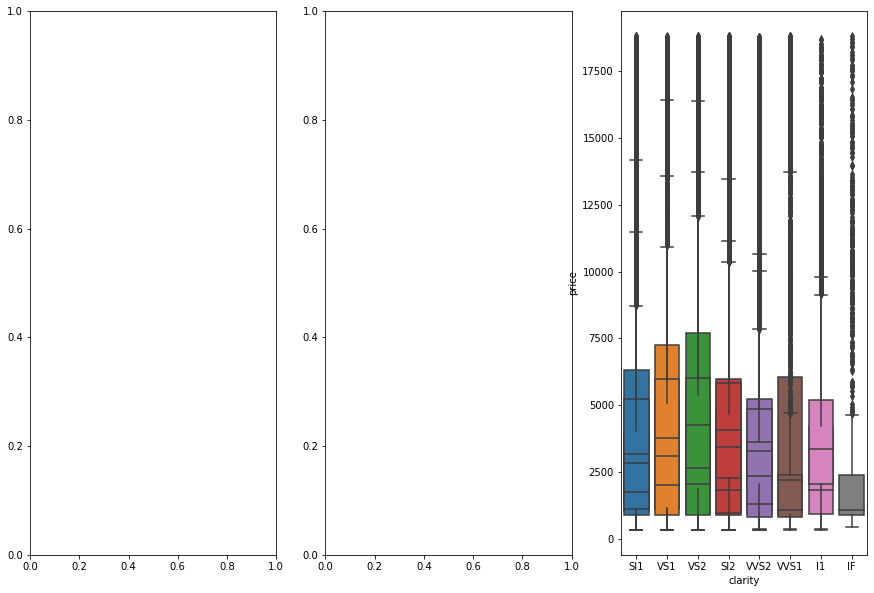

In [399]:
fig, ax = plt.subplots(1, 3, figsize=(15,10))
sns.boxplot(x='cut', y='price', data=diamonds)
sns.boxplot(x='color', y='price', data=diamonds)
sns.boxplot(x='clarity', y='price', data=diamonds);

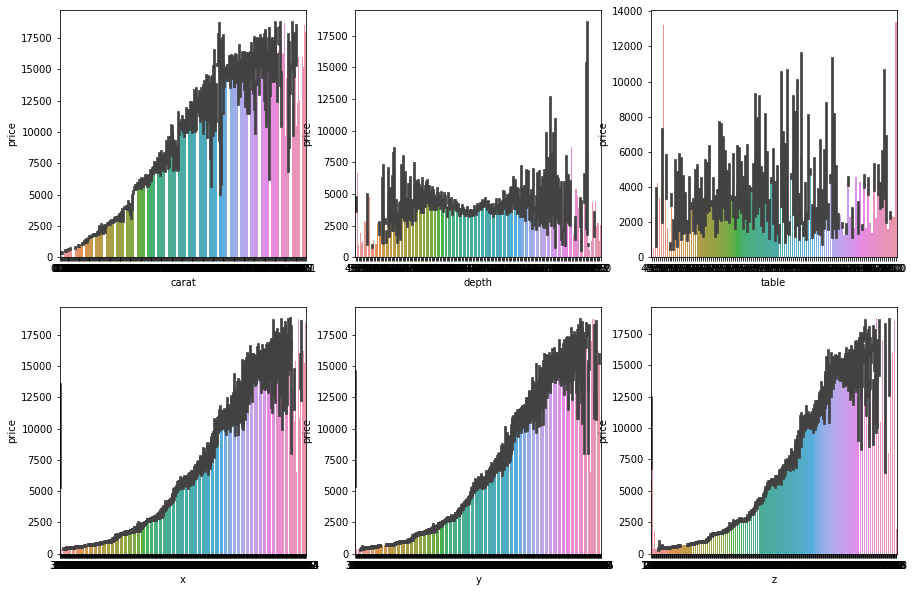

In [392]:
fig, ax = plt.subplots(2,3, figsize=(15,10))
sns.barplot(x=diamonds.carat, y=diamonds.price, ax=ax[0][0])
sns.barplot(x=diamonds.depth, y=diamonds.price, ax=ax[0][1])
sns.barplot(x=diamonds.table, y=diamonds.price, ax=ax[0][2])
sns.barplot(x=diamonds.x, y=diamonds.price, ax=ax[1][0])
sns.barplot(x=diamonds.y, y=diamonds.price, ax=ax[1][1])
sns.barplot(x=diamonds.z, y=diamonds.price, ax=ax[1][2]);

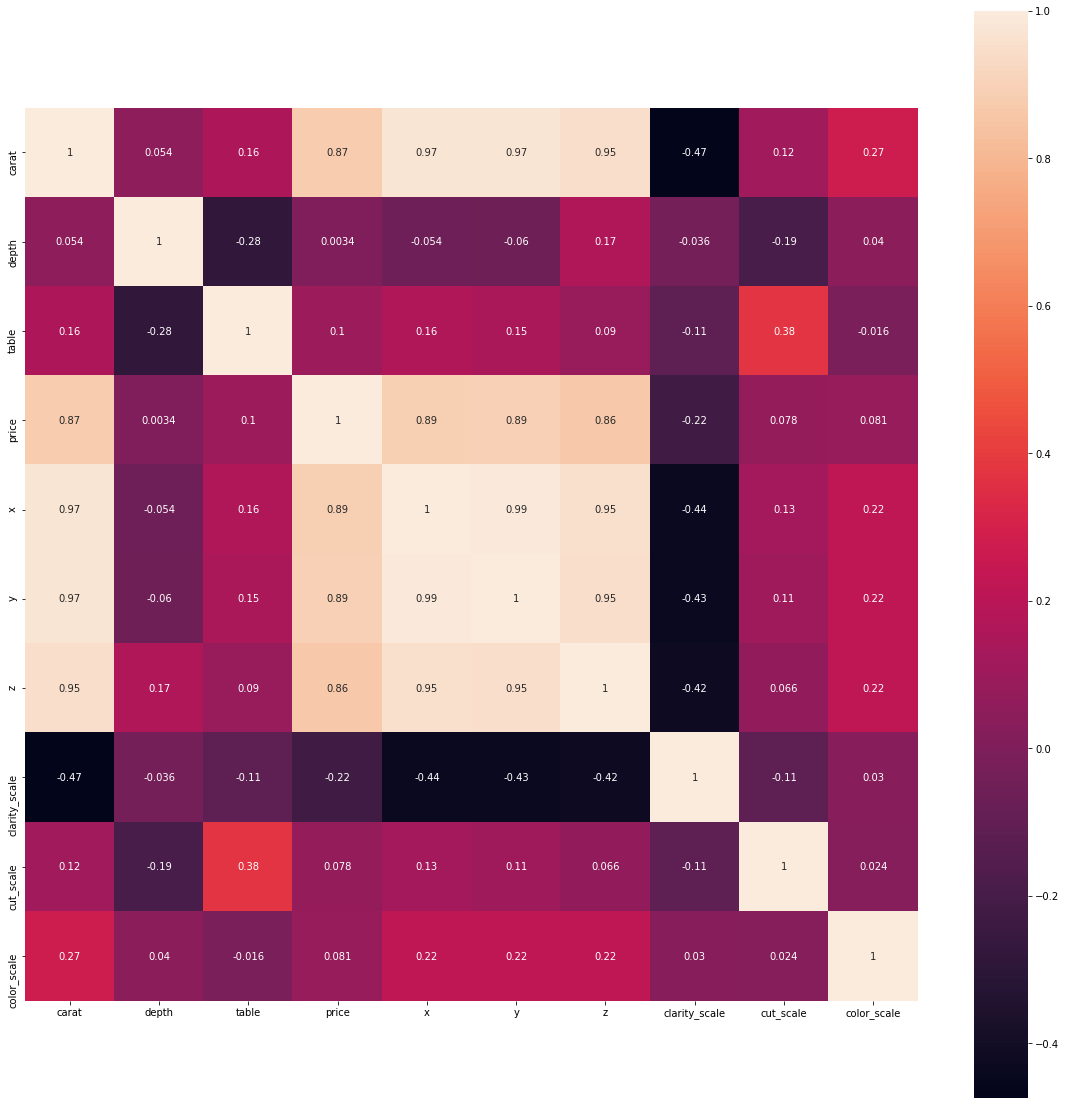

In [119]:
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)